In [ ]:
!pip install neattext

     |████████████████████████████████| 112kB 13.1MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import neattext.functions as nfx

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Emotion_datsetfecer.csv')

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/emotion_dataset.csv')

In [ ]:
df3 = df2.append(df)

In [ ]:
df4 = pd.read_csv('/content/drive/MyDrive/dailydialogue.csv')

In [ ]:
df3.head()

,Emotion,Text
0,happy,I suppose I am happy being so ` tiny' ; it mea...
1,happy,Lennox has always truly wanted to fight for th...
2,happy,"He was a professional musician now , still sen..."
3,happy,Holmes is happy having the freedom of the hous...
4,happy,I had problems with tutors trying to encourage...


In [ ]:
df3['Emotion'].value_counts()

anger       1554
fear        1504
shame       1200
disgust     1162
joy         1081
sadness     1067
guilt       1052
sad          575
happy        479
surprise     213
Name: Emotion, dtype: int64

In [ ]:
from textblob import TextBlob


In [ ]:
def getsentiment(text):
  blob = TextBlob(text)
  sentiment = blob.sentiment.polarity
  if sentiment > 0:
    result = 'Postive'
  elif sentiment < 0:
    result = 'Negative'
  else:
    result = 'Neutral'
  return result

In [ ]:
#getsentiment('i am happy')

In [ ]:
df3['Sentiment'] = df3['Text'].apply(getsentiment)

In [ ]:
df3.tail()

,Emotion,Text,Sentiment
7468,anger,Two years back someone invited me to be the tu...,Negative
7469,sadness,I had taken the responsibility to do something...,Negative
7470,disgust,I was at home and I heard a loud sound of spit...,Postive
7471,shame,I did not do the homework that the teacher had...,Neutral
7472,guilt,I had shouted at my younger brother and he was...,Negative


In [ ]:
df3['cleanText'] = df3['Text'].apply(nfx.remove_stopwords)

In [ ]:
df3['cleanText'] = df3['cleanText'].apply(nfx.remove_userhandles)
df3['cleanText'] = df3['cleanText'].apply(nfx.remove_punctuations)

In [ ]:
df3[['Text','cleanText']][:5]

,Text,cleanText
0,I suppose I am happy being so ` tiny' ; it mea...,suppose happy tiny means able surprise peopl...
1,Lennox has always truly wanted to fight for th...,Lennox truly wanted fight world title happy ta...
2,"He was a professional musician now , still sen...",professional musician sensitive happy loved
3,Holmes is happy having the freedom of the hous...,Holmes happy freedom house
4,I had problems with tutors trying to encourage...,problems tutors trying encourage diversity wor...


In [ ]:
from collections import Counter,OrderedDict

In [ ]:
def extract_keywords(text,num=50):
  tokens = [tok for tok in text.split()]
  most_common_token = Counter(tokens).most_common(num)
  return dict(most_common_token)

In [ ]:
emotion_list = df3['Emotion'].unique().tolist()

In [ ]:
emotion_list

['happy',
 'sad',
 'surprise',
 'disgust',
 'anger',
 'fear',
 'shame',
 'joy',
 'sadness',
 'guilt']

In [ ]:
#df[df['Emotion']=='joy']
joy_list = df3[df3['Emotion']=='joy']['cleanText'].tolist()
joy_sent = ' '.join(joy_list)#for future refernce

In [ ]:
joy_keywords = extract_keywords(joy_sent)
joy_keywords

{'University': 27,
 'accepted': 47,
 'admitted': 28,
 'birthday': 27,
 'boyfriend': 42,
 'came': 57,
 'close': 34,
 'day': 46,
 'exam': 54,
 'examination': 41,
 'exams': 35,
 'family': 27,
 'feeling': 28,
 'felt': 98,
 'found': 26,
 'friend': 122,
 'friends': 64,
 'gave': 35,
 'girl': 36,
 'girlfriend': 32,
 'good': 75,
 'got': 116,
 'happy': 95,
 'heard': 45,
 'home': 42,
 'it': 27,
 'joy': 88,
 'letter': 37,
 'long': 57,
 'love': 49,
 'me': 74,
 'met': 51,
 'months': 28,
 'parents': 27,
 'passed': 98,
 'person': 25,
 'present': 26,
 'received': 51,
 'results': 39,
 'saw': 37,
 'school': 61,
 'seen': 32,
 'selected': 40,
 'time': 103,
 'told': 51,
 'university': 48,
 'wanted': 25,
 'went': 42,
 'year': 67,
 'years': 36}

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xfeatures = df3['cleanText']
ylabels = df3['Emotion']

In [ ]:
print(xfeatures[:5])

0    suppose happy  tiny  means able surprise peopl...
1    Lennox truly wanted fight world title happy ta...
2        professional musician  sensitive happy loved 
3                          Holmes happy freedom house 
4    problems tutors trying encourage diversity wor...
Name: cleanText, dtype: object


In [ ]:
#vectoriztion
cv = CountVectorizer()
X = cv.fit_transform(xfeatures)

In [ ]:
#get features by name 

In [ ]:
cv.get_feature_names()

['00',
 '000',
 '10',
 '100',
 '1000',
 '100000',
 '102',
 '1030',
 '10t',
 '10th',
 '10year',
 '10yrs',
 '11',
 '110km',
 '1130',
 '11months',
 '11th',
 '12',
 '120',
 '1200',
 '122',
 '1230',
 '128600',
 '1295',
 '12th',
 '12yearold',
 '13',
 '1314',
 '13th',
 '14',
 '140',
 '1400',
 '15',
 '150',
 '1500',
 '1516',
 '15yearold',
 '16',
 '16year',
 '16yearold',
 '17',
 '1741',
 '17th',
 '18',
 '180',
 '187',
 '1878',
 '18th',
 '18years',
 '19',
 '191523',
 '1917',
 '1926',
 '1929',
 '1930s',
 '1936',
 '1939',
 '1940s',
 '1956',
 '1960',
 '1960s',
 '1966',
 '1968',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1980s',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1989',
 '1991',
 '1992',
 '199394',
 '1997',
 '19th',
 '1a',
 '1bs',
 '1st',
 '20',
 '200',
 '2000',
 '20000',
 '200000',
 '2035',
 '20s',
 '20th',
 '21',
 '210',
 '2118',
 '218',
 '218000',
 '21st',
 '22',
 '22nd',
 '23',
 '230',
 '2300',
 '231',
 '23monthold',
 '23rd',
 '24',
 '

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42)


In [ ]:
#building the model
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
model.score(X_test,y_test)

0.5824064711830131

In [ ]:
y_pred_ = model.predict(X_test)

In [ ]:
y_pred_

array(['sadness', 'disgust', 'sadness', ..., 'joy', 'joy', 'anger'],
      dtype='<U8')

In [ ]:
#single statement
sample_text = ['I love coding']
vect = cv.transform(sample_text).toarray()

In [ ]:
model.predict(vect)

array(['joy'], dtype='<U8')

In [ ]:
#probablity for the prediction or confidence score
model.predict_proba(vect)

array([[0.09852517, 0.07425414, 0.0852916 , 0.10940336, 0.00878685,
        0.30803125, 0.02006817, 0.18997275, 0.10361838, 0.00204833]])

In [ ]:
#classes for our model
model.classes_

array(['anger', 'disgust', 'fear', 'guilt', 'happy', 'joy', 'sad',
       'sadness', 'shame', 'surprise'], dtype='<U8')

In [ ]:
np.max(model.predict_proba(vect))

0.308031249273653

In [ ]:
def predict_emotion(sample_text,model):
  vect = cv.transform(sample_text).toarray()
  acc = model.predict(vect)
  pred_proba = model.predict_proba(vect)[0]
  pred_percent = dict(zip(model.classes_,pred_proba))
  sorted_emotions = sorted(pred_percent.items(), key=lambda x: x[1], reverse=True)
  print(f'emotion in text is :{acc[0]} and prediction score is {np.max(pred_proba)}')
  return sorted_emotions


In [ ]:
predict_emotion(sample_text,model)

emotion in text is :joy and prediction score is 0.308031249273653


[('joy', 0.308031249273653),
 ('sadness', 0.18997275263605432),
 ('guilt', 0.10940336474281633),
 ('shame', 0.10361838190506271),
 ('anger', 0.09852516655986576),
 ('fear', 0.08529160114465163),
 ('disgust', 0.07425413866024953),
 ('sad', 0.020068165195970593),
 ('happy', 0.008786850200634813),
 ('surprise', 0.0020483296810411954)]

In [ ]:
#evaluation
print(classification_report(y_test,y_pred_))

              precision    recall  f1-score   support

       anger       0.53      0.56      0.54       474
     disgust       0.69      0.55      0.61       351
        fear       0.63      0.74      0.68       472
       guilt       0.41      0.46      0.43       304
       happy       0.85      0.60      0.71       144
         joy       0.59      0.69      0.64       304
         sad       0.83      0.51      0.63       182
     sadness       0.55      0.56      0.56       308
       shame       0.52      0.53      0.52       355
    surprise       0.94      0.41      0.57        73

    accuracy                           0.58      2967
   macro avg       0.65      0.56      0.59      2967
weighted avg       0.60      0.58      0.58      2967



<Figure size 2880x2880 with 0 Axes>

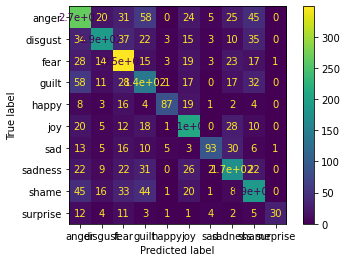

In [ ]:
#confusion matrix
plt.figure(figsize=(40, 40))
plot_confusion_matrix(model,X_test,y_test)

In [ ]:
#saving the model
import joblib
model_file = open('Text_classifier_nv','wb')
joblib.dump(model,model_file)
model_file.close()

In [ ]:
#model intepretations - logictic_regression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_model.score(X_test,y_test)

0.6370070778564206

In [ ]:
predict_emotion(sample_text,lr_model)

emotion in text is :joy and prediction score is 0.3216246583246337


[('joy', 0.3216246583246337),
 ('sadness', 0.16734570125153805),
 ('fear', 0.12837614844049267),
 ('guilt', 0.10373869437223535),
 ('anger', 0.07835593430220836),
 ('shame', 0.06572135442423005),
 ('disgust', 0.06119497874092966),
 ('sad', 0.036661542475862806),
 ('happy', 0.02327135965849455),
 ('surprise', 0.013709628009374822)]

In [ ]:
#lr model is little better
#saving the logistic model
import joblib
model_file = open('Text_classifier_Logistic','wb')
joblib.dump(lr_model,model_file)
model_file.close()

In [ ]:
predict_emotion(['I love Coding'],model)

emotion in text is :joy and prediction score is 0.308031249273653


[('joy', 0.308031249273653),
 ('sadness', 0.18997275263605432),
 ('guilt', 0.10940336474281633),
 ('shame', 0.10361838190506271),
 ('anger', 0.09852516655986576),
 ('fear', 0.08529160114465163),
 ('disgust', 0.07425413866024953),
 ('sad', 0.020068165195970593),
 ('happy', 0.008786850200634813),
 ('surprise', 0.0020483296810411954)]

In [ ]:
predict_emotion(['I am sad'],lr_model)

emotion in text is :sadness and prediction score is 0.4221458584932662


[('sadness', 0.4221458584932662),
 ('sad', 0.41947527182801025),
 ('guilt', 0.06375537515094669),
 ('anger', 0.03153257813817961),
 ('disgust', 0.014600207127432164),
 ('shame', 0.013511646755577046),
 ('fear', 0.011176470894385455),
 ('happy', 0.009759082821792085),
 ('joy', 0.007968756383496858),
 ('surprise', 0.006074752406913579)]

In [ ]:
predict_emotion(['I love gaming'], lr_model)


emotion in text is :joy and prediction score is 0.3216246583246337


[('joy', 0.3216246583246337),
 ('sadness', 0.16734570125153805),
 ('fear', 0.12837614844049267),
 ('guilt', 0.10373869437223535),
 ('anger', 0.07835593430220836),
 ('shame', 0.06572135442423005),
 ('disgust', 0.06119497874092966),
 ('sad', 0.036661542475862806),
 ('happy', 0.02327135965849455),
 ('surprise', 0.013709628009374822)]

In [ ]:
predict_emotion(['I am sad'],lr_model)

emotion in text is :sadness and prediction score is 0.4221458584932662


[('sadness', 0.4221458584932662),
 ('sad', 0.41947527182801025),
 ('guilt', 0.06375537515094669),
 ('anger', 0.03153257813817961),
 ('disgust', 0.014600207127432164),
 ('shame', 0.013511646755577046),
 ('fear', 0.011176470894385455),
 ('happy', 0.009759082821792085),
 ('joy', 0.007968756383496858),
 ('surprise', 0.006074752406913579)]

In [ ]:
predict_emotion(['I love my car'],lr_model)

emotion in text is :guilt and prediction score is 0.23833987811849666


[('guilt', 0.23833987811849666),
 ('sadness', 0.22008400213562326),
 ('fear', 0.20334628948384056),
 ('joy', 0.1762966316396981),
 ('anger', 0.07333311337481098),
 ('shame', 0.03078297540237846),
 ('disgust', 0.024133213080110082),
 ('sad', 0.01612029288505181),
 ('happy', 0.00928260139424345),
 ('surprise', 0.008281002485746449)]

In [ ]:
predict_emotion(['I love Amity'],lr_model)

emotion in text is :joy and prediction score is 0.3216246583246337


[('joy', 0.3216246583246337),
 ('sadness', 0.16734570125153805),
 ('fear', 0.12837614844049267),
 ('guilt', 0.10373869437223535),
 ('anger', 0.07835593430220836),
 ('shame', 0.06572135442423005),
 ('disgust', 0.06119497874092966),
 ('sad', 0.036661542475862806),
 ('happy', 0.02327135965849455),
 ('surprise', 0.013709628009374822)]

In [ ]:
predict_emotion(['I hate myself'],model)

emotion in text is :anger and prediction score is 0.3182367787467302


[('anger', 0.3182367787467302),
 ('shame', 0.25383853384058397),
 ('guilt', 0.1264624281212136),
 ('disgust', 0.11144138319040389),
 ('sadness', 0.06961663296999011),
 ('fear', 0.05777352419131794),
 ('joy', 0.039477975239569224),
 ('happy', 0.012750330256233377),
 ('sad', 0.00708651308246278),
 ('surprise', 0.0033159003614963126)]

In [ ]:
predict_emotion(['I love Amity'],model)

emotion in text is :joy and prediction score is 0.308031249273653


[('joy', 0.308031249273653),
 ('sadness', 0.18997275263605432),
 ('guilt', 0.10940336474281633),
 ('shame', 0.10361838190506271),
 ('anger', 0.09852516655986576),
 ('fear', 0.08529160114465163),
 ('disgust', 0.07425413866024953),
 ('sad', 0.020068165195970593),
 ('happy', 0.008786850200634813),
 ('surprise', 0.0020483296810411954)]

In [ ]:
predict_emotion(['I love Avengers Endgame'],model)

emotion in text is :joy and prediction score is 0.308031249273653


[('joy', 0.308031249273653),
 ('sadness', 0.18997275263605432),
 ('guilt', 0.10940336474281633),
 ('shame', 0.10361838190506271),
 ('anger', 0.09852516655986576),
 ('fear', 0.08529160114465163),
 ('disgust', 0.07425413866024953),
 ('sad', 0.020068165195970593),
 ('happy', 0.008786850200634813),
 ('surprise', 0.0020483296810411954)]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
x_pred = dtree.predict(X_test)
print('---------------------------Decision tree-----------------------------\n\n',classification_report(y_test,x_pred))

---------------------------Decision tree-----------------------------

               precision    recall  f1-score   support

       anger       0.59      0.52      0.55       474
     disgust       0.43      0.58      0.49       351
        fear       0.71      0.68      0.70       472
       guilt       0.41      0.40      0.41       304
       happy       0.82      0.95      0.88       144
         joy       0.48      0.50      0.49       304
         sad       0.80      0.83      0.81       182
     sadness       0.50      0.47      0.49       308
       shame       0.50      0.40      0.44       355
    surprise       0.94      0.92      0.93        73

    accuracy                           0.57      2967
   macro avg       0.62      0.63      0.62      2967
weighted avg       0.57      0.57      0.57      2967



In [ ]:
predict_emotion(['I love coding'],dtree)

emotion in text is :sadness and prediction score is 1.0


[('sadness', 1.0),
 ('anger', 0.0),
 ('disgust', 0.0),
 ('fear', 0.0),
 ('guilt', 0.0),
 ('happy', 0.0),
 ('joy', 0.0),
 ('sad', 0.0),
 ('shame', 0.0),
 ('surprise', 0.0)]

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import SGDClassifier
ovo_clf = OneVsOneClassifier(estimator=SGDClassifier())
ovo_clf.fit(X_train,y_train)
x_pred = ovo_clf.predict(X_test)
print('---------------------------OneVsOne-----------------------------\n\n',classification_report(y_test,x_pred))



---------------------------OneVsOne-----------------------------

               precision    recall  f1-score   support

       anger       0.56      0.51      0.53       474
     disgust       0.55      0.51      0.53       351
        fear       0.71      0.68      0.70       472
       guilt       0.37      0.44      0.40       304
       happy       0.89      0.93      0.91       144
         joy       0.57      0.60      0.59       304
         sad       0.93      0.76      0.84       182
     sadness       0.53      0.57      0.55       308
       shame       0.47      0.50      0.48       355
    surprise       1.00      0.88      0.93        73

    accuracy                           0.59      2967
   macro avg       0.66      0.64      0.65      2967
weighted avg       0.60      0.59      0.59      2967



In [ ]:
vect = cv.transform(['I felt sorry for what I did']).toarray() 
acc = ovo_clf.predict(vect)
print(f'emotion is {acc}')
ovo_clf.score(X_test,y_test)
  

emotion is ['guilt']


0.5898213683855746

In [ ]:
S_clf = SGDClassifier()
S_clf.fit(X_train,y_train)
x_pred_4 = S_clf.predict(X_test)
print('---------------------------SGD CLassifier  Multiclass-----------------------------\n\n',classification_report(y_test,x_pred_4))
S_clf.score(X_test,y_test)

---------------------------SGD CLassifier  Multiclass-----------------------------

               precision    recall  f1-score   support

       anger       0.59      0.53      0.56       474
     disgust       0.56      0.55      0.56       351
        fear       0.73      0.71      0.72       472
       guilt       0.40      0.41      0.41       304
       happy       0.90      0.96      0.93       144
         joy       0.60      0.66      0.63       304
         sad       0.90      0.77      0.83       182
     sadness       0.54      0.56      0.55       308
       shame       0.51      0.52      0.52       355
    surprise       0.97      0.93      0.95        73

    accuracy                           0.61      2967
   macro avg       0.67      0.66      0.66      2967
weighted avg       0.62      0.61      0.61      2967



0.6127401415571284

In [ ]:
vect = cv.transform(['I am sad']).toarray()
acc = S_clf.predict(vect)
print(f'emotion is {acc}')
S_clf.score(X_test,y_test)

emotion is ['sadness']


0.6127401415571284